# TD 1 - Smart Machining - Exercise 2

This exercise will allow you to predict cutting forces for each cutting edge and cutting power in axial drilling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

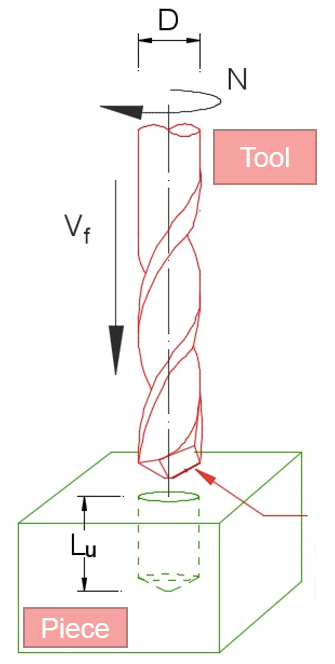

## 1) The input parameters in this example for the drilling processes are :


*   Tool Diameter is 6 mm
*   The tool point angle is $120^o$
*   The drilling depth is 8 mm
*   The feed per revolution is 0,1 mm/rev
*   The cutting speed for Aluminum is 200 mm/min
*   The estimated specific cutting force for this tool and material is 2000 MPa





In [2]:
D=6 # mm
point_angle=120 # deg
Dh=8 # mm
fz=0.1 # mm/rev
Vc=200 # mm/min
Kc=2000 # MPa

## 2) Calculate the depth of cut (mm), the spindle speed (in rpm), the feed velocity (mm/min)

In [13]:
ap=D/2 #mm
print(f"ap = {ap:.2f} mm")
N= Vc/(np.pi*D) #rpm
print(f"N = {N:.2f} rpm") 
Vf= fz*2*N #mm/min
print(f"Vf = {Vf:.2f} mm/min")

ap = 3.00 mm
N = 10.61 rpm
Vf = 2.12 mm/min


## 3) Calculate the area of cut when the tool is in contact to the workpiece and the cutting force for each cutting edge (there are two !)

$F_c^{(1)} = K_c a_p f_t$

In [14]:
Fc1=Kc*ap*fz
print(f"Fc1 = {Fc1:.2f} N")

Fc1 = 600.00 N


## 4) Calculate the machining time and the point height H. What is the Power of both cutting edges after the tool in engaged ?

In [15]:
theta=(90-(120/2))*np.pi/180 #rad
H= D/(2*np.cos(theta))*np.sin(theta)
print(f"H = {H:.4f} mm")

H = 1.7321 mm


In [20]:
Lu= Dh
t_mach=Lu/Vf
print(f"t_mach = {t_mach:.2f} min")
Vc_average=Vc/2
Pc = 2*Fc1*Vc_average
print(f"Pc = {Pc:.2f} W")

t_mach = 3.77 min
Pc = 120000.00 W


# 5) Plot a curve of the cutting power for the complete time of cut considering that the tool begin from 100 mm distance to the workpiece and the tool velocity when it is not cutting is 500 mm/min.

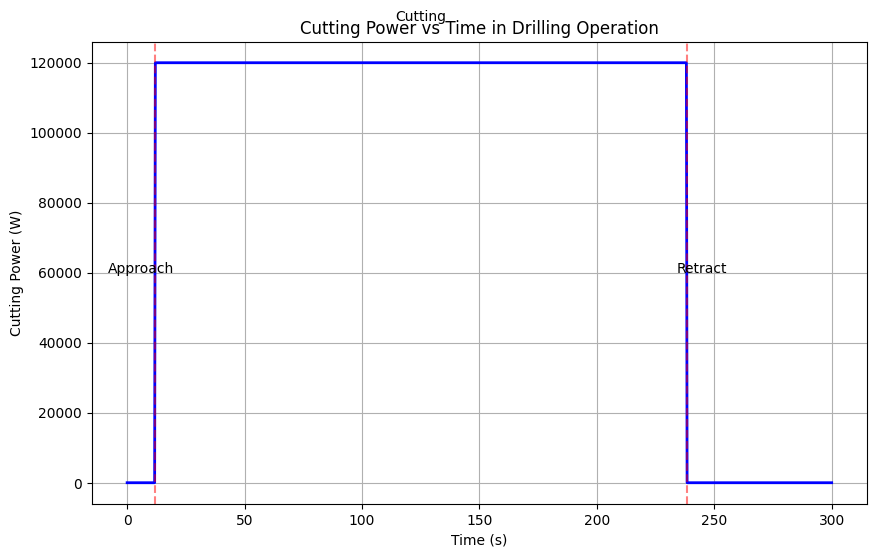

In [24]:
tm=5 # minutes

t = np.linspace(0, tm*60, 1000)

rapid_feed = 500  # mm/min
approach_distance = 100  # mm
t_approach = approach_distance/rapid_feed  # min
t_retract = (Dh + approach_distance)/rapid_feed  # min
total_time = t_approach + t_mach + t_retract  # min

power = np.zeros_like(t)

# Calculate power for each phase
for i, time in enumerate(t):
    if time < t_approach*60:  # Approach phase
        power[i] = 0
    elif time < (t_approach + t_mach)*60:  # Cutting phase
        power[i] = Pc
    else:  # Retract phase
        power[i] = 0

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t, power, 'b-', linewidth=2)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Cutting Power (W)')
plt.title('Cutting Power vs Time in Drilling Operation')

# Add annotations for different phases
plt.axvline(t_approach*60, color='r', linestyle='--', alpha=0.5)
plt.axvline((t_approach + t_mach)*60, color='r', linestyle='--', alpha=0.5)
plt.text(t_approach*60/2, Pc/2, 'Approach', ha='center')
plt.text(t_approach*60 + t_mach*60/2, Pc*1.1, 'Cutting', ha='center')
plt.text((t_approach + t_mach)*60 + t_retract*60/2, Pc/2, 'Retract', ha='center')

plt.show()



